In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = "202107-citibike-tripdata.csv"
df = pd.read_csv(data_path)

/Users/Abe/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape
n = df.shape[0]
n ####BE SURE TO RECOMPUTE THIS AFTER WE FILTER OUT RIDES

3084537

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual


In [5]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,3084537,object,225171329
1,rideable_type,3,object,212794384
2,started_at,1558050,object,234424940
3,ended_at,1560576,object,234424940
4,start_station_name,1492,object,237703352
5,start_station_id,1487,float64,24676424
6,end_station_name,1520,object,237106992
7,end_station_id,2595,object,151133715
8,start_lat,2148,float64,24676424
9,start_lng,2138,float64,24676424


In [6]:
# df['started_at'][0].split(" ")[1]

In [7]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [8]:
df = df[df['ended_at'] != "2021-07-09 09:21:"]

In [9]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
df[['started_at', 'ended_at']]

,started_at,ended_at
0,2021-07-09 16:05:36,2021-07-09 16:18:09
1,2021-07-11 16:23:35,2021-07-11 16:29:07
2,2021-07-23 06:22:40,2021-07-23 06:36:13
3,2021-07-05 16:08:10,2021-07-05 16:36:00
4,2021-07-26 12:28:57,2021-07-26 12:30:21
...,...,...
3084532,2021-07-08 14:08:12,2021-07-08 14:35:15
3084533,2021-07-24 12:26:49,2021-07-24 12:47:18
3084534,2021-07-04 17:11:16,2021-07-04 17:18:23
3084535,2021-07-30 09:43:46,2021-07-30 09:57:50


In [11]:
df['duration'] = df['ended_at'] - df['started_at']

In [12]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,3084537,object,249847497
1,rideable_type,3,object,237470552
2,started_at,1558050,datetime64[ns],49352592
3,ended_at,1560576,datetime64[ns],49352592
4,start_station_name,1492,object,262379520
5,start_station_id,1487,float64,49352592
6,end_station_name,1520,object,261783160
7,end_station_id,2595,object,175809883
8,start_lat,2148,float64,49352592
9,start_lng,2138,float64,49352592


In [13]:
df['duration'][0].total_seconds()/60

12.55

In [14]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [15]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,12.550000
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,5.533333
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,13.550000
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,27.833333
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,1.400000


<AxesSubplot:ylabel='Frequency'>

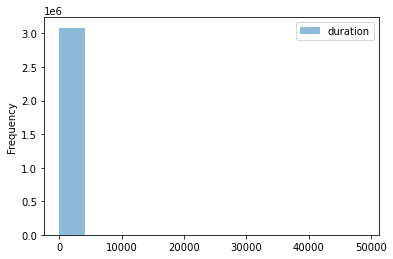

In [16]:
dfh = df[['ride_id','duration']]
dfh.plot.hist(bins=12, alpha=0.5)

In [18]:
# 2. What is the expected ride duration (i.e., the average ride duration)? 

exp_duration = df['duration'].sum()/n
print("Expected ride duration: ", exp_duration)

# What is the empirical variance of ride duration? 

# var(X) = E[X^2] - E[X]^2

df['sq_duration'] = df['duration']**2
exp_sq_duration = df['sq_duration'].sum()/n
#print(exp_sq_duration)

var_duration = exp_sq_duration - exp_duration**2 
print("Variance in ride duration: ", var_duration)

# What is the probability that a ride duration is greater than 20 min?
over_20 = 0
for i in range(n):
    if df['duration'][i] > 20:
        over_20 += 1
        
p_over_20 = over_20/n
print("Probability of ride lasting > 20 mins: ", p_over_20) 

Expected ride duration:  18.024970316992995
Variance in ride duration:  6915.026259465492
Probability of ride lasting > 20 mins:  0.24975125926516686


In [26]:
# 3. What is the probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member?

over_20_member = 0
member_rides = 0
casual_rides = 0
for i in range(n):
    if df['member_casual'][i] == 'member':
        member_rides += 1
        if df['duration'][i] > 20: #only count rides over 20 min for which the user is a member
            over_20_member += 1
    
    elif df['member_casual'][i] == 'casual':
        casual_rides += 1
        
p_over_20_mem = over_20_member/member_rides
print(p_over_20_mem)

0.1942044473470034


In [23]:
# 4.Suppose that the duration of some ride is more than 25min. What is the probability that this ride belongs to a CitiBike member?

# Bayes: P(Member|25+) = P(25+|Member)*P(Member)/( P(25+|Member)*P(Member) + P(25+|Casual)*P(Casual))

#compute P(Member) and P(Casual)
p_member = member_rides/n
p_casual = casual_rides/n

# P(25+|Member) and P(25+|Casual)
over25_member = 0
over25_casual = 0
for i in range(n):
    if df['duration'][i] > 25:
        if df['member_casual'][i] == 'member':
            over25_member += 1
        else:
            over25_casual += 1

p_over25_member = over25_member/member_rides
p_over25_casual = over25_casual/casual_rides

numerator = p_over25_member * p_member
denominator = p_over25_member * p_member + p_over25_casual * p_casual

p_member_given_over25 = numerator/denominator

p_member_given_over25




0.4828191891922421

In [42]:
# function to build a transition matrix given transition frequencies
# frequencies is an array of length 2*(station capacity) + 1:

f = [0, 0, 0, 3, 40, 84, 100, 80, 35, 1, 0, 0, 0] #capacity 6 example
#   [-6,-5,-4,-3,-2, -1,  0,  +1, +2,+3,+4,+5,+6]

def matrix(frequencies):
    
    m = len(frequencies) #note that m is always odd
    rides = sum(frequencies)
    
    probs = [freq/rides for freq in frequencies]
    
    zero_index = int(m/2)
    rows = []
    for i in range(int(m/2) + 1):
        r = probs[zero_index - i : m - i]
        rows.append(r)
        s = sum(rows[-1])
        rows[-1] = [p/s for p in rows[-1]]
        
    return rows

#matrix(f)
for row in matrix(f):
    print(len(row))

# freq = [0 for i in range(station_capacity*2 + 1)]
# for i in range(108):
    
#     net_change = 0
    
#     if station == True:
        
#         if start_time >= 5am + 300*i and start_time < 5:05 + 300*i:
#             net_change -= 0
                
#         elif end_time >= 5am + 300*i and end_time < 5:05 + 300*i:
#             net_change += 1
    
#     freq[net_change + station_capacity] += 1
    


[0.2915451895043732, 0.23323615160349853, 0.10204081632653061, 0.0029154518950437317, 0.0, 0.0, 0.0]
7
7
7
7
7
7
7
